### Investigation A
### Moon's Part (Vigilance Analysis: whether or not rats make bats hesitate more)
### Step 1: Import Libraries

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### Step 2: Load Datasets

In [32]:
d1 = pd.read_csv("dataset1.csv")
d2 = pd.read_csv("dataset2.csv")
d1.head(), d2.head()


(         start_time  bat_landing_to_food habit  rat_period_start  \
 0  30/12/2017 18:37            16.000000   rat  30/12/2017 18:35   
 1  30/12/2017 19:51             0.074016  fast  30/12/2017 19:50   
 2  30/12/2017 19:51             4.000000  fast  30/12/2017 19:50   
 3  30/12/2017 19:52            10.000000   rat  30/12/2017 19:50   
 4  30/12/2017 19:54            15.000000   rat  30/12/2017 19:50   
 
      rat_period_end  seconds_after_rat_arrival  risk  reward  month  \
 0  30/12/2017 18:38                        108     1       0      0   
 1  30/12/2017 19:55                         17     0       1      0   
 2  30/12/2017 19:55                         41     0       1      0   
 3  30/12/2017 19:55                        111     1       0      0   
 4  30/12/2017 19:55                        194     1       0      0   
 
         sunset_time  hours_after_sunset  season  
 0  30/12/2017 16:45            1.870833       0  
 1  30/12/2017 16:45            3.100833       0

### Step 3: Clean and Merge

In [33]:
d1['start_time'] = pd.to_datetime(d1['start_time'], errors='coerce', dayfirst=True)
d2['time'] = pd.to_datetime(d2['time'], errors='coerce', dayfirst=True)

merged = pd.merge_asof(
    d1.sort_values("start_time"),
    d2.sort_values("time"),
    left_on="start_time",
    right_on="time",
    direction="backward",
    tolerance=pd.Timedelta("30min")
)

merged = merged.dropna(subset=["rat_minutes","risk","bat_landing_to_food"])
merged.head()


,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month_x,sunset_time,hours_after_sunset_x,season,time,month_y,hours_after_sunset_y,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,2017-12-26 20:57:00,1.0,NaN,26/12/2017 20:53,26/12/2017 20:58,239,0,0,0,26/12/2017 16:43,4.248611,0,2017-12-26 20:43:00,0,4.0,51,2.968874,1.283333,2
1,2017-12-26 20:57:00,5.0,NaN,26/12/2017 20:53,26/12/2017 20:58,199,0,0,0,26/12/2017 16:43,4.237500,0,2017-12-26 20:43:00,0,4.0,51,2.968874,1.283333,2
2,2017-12-26 21:24:00,3.0,fast,26/12/2017 21:22,26/12/2017 21:27,121,0,1,0,26/12/2017 16:43,4.693611,0,2017-12-26 21:13:00,0,4.5,53,2.561404,4.866667,1
3,2017-12-26 21:24:00,15.0,rat,26/12/2017 21:22,26/12/2017 21:27,88,1,0,0,26/12/2017 16:43,4.684444,0,2017-12-26 21:13:00,0,4.5,53,2.561404,4.866667,1
4,2017-12-26 21:24:00,6.0,pick,26/12/2017 21:22,26/12/2017 21:27,113,0,1,0,26/12/2017 16:43,4.691389,0,2017-12-26 21:13:00,0,4.5,53,2.561404,4.866667,1


### Step 4: Linear Regression – Hesitation vs Rat Presence

In [34]:
Y = merged["bat_landing_to_food"]
X = merged[["rat_minutes","seconds_after_rat_arrival"]]
X = sm.add_constant(X, has_constant="add")

model = sm.OLS(Y, X).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     bat_landing_to_food   R-squared:                       0.008
Model:                             OLS   Adj. R-squared:                  0.006
Method:                  Least Squares   F-statistic:                     3.722
Date:                 Wed, 10 Sep 2025   Prob (F-statistic):             0.0246
Time:                         19:25:32   Log-Likelihood:                -4293.5
No. Observations:                  907   AIC:                             8593.
Df Residuals:                      904   BIC:                             8607.
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         8.7383      1.632      5.354      0.000       5.535      11.941
rat_minutes                   0.3290      0.126      2.616      0.009       0.082       0.576
seconds_after_rat_arrival    -0.0014      0.004     -0.328      0.743      -0.009       0.007
==============================================================================
Omnibus:                     1268.440   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           290499.493
Skew:                           7.666   Prob(JB):                         0.00
Kurtosis:                      89.324   Cond. No.                         663.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Step 5: Visualisation – Hesitation by Risk Behaviour

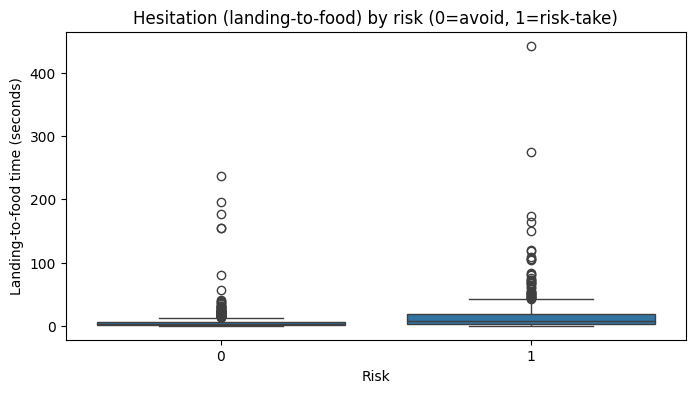

In [35]:
plt.figure(figsize=(8,4))
sns.boxplot(x="risk", y="bat_landing_to_food", data=merged)
plt.title("Hesitation (landing-to-food) by risk (0=avoid, 1=risk-take)")
plt.xlabel("Risk")
plt.ylabel("Landing-to-food time (seconds)")
plt.show()


### Step 6: Histogram – Distribution of Hesitation Times

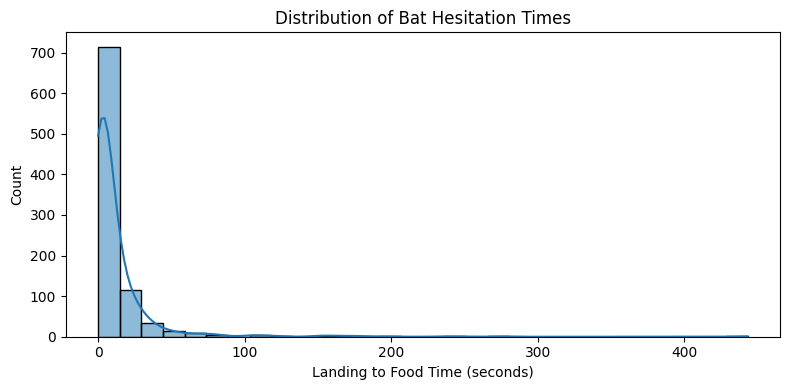

In [36]:
plt.figure(figsize=(8,4))
sns.histplot(merged["bat_landing_to_food"], bins=30, kde=True)
plt.title("Distribution of Bat Hesitation Times")
plt.xlabel("Landing to Food Time (seconds)")
plt.ylabel("Count")
plt.tight_layout()
plt.show()